## Import Library

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

## Import Dataset

In [2]:
df = pd.read_csv('/kaggle/input/fake-reviews-dataset/fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [3]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


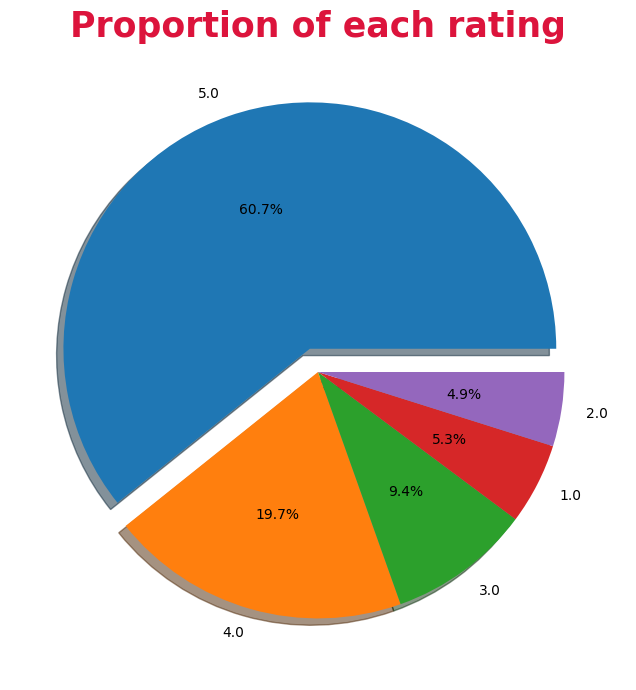

In [6]:
df['rating'].value_counts()

plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each rating', fontweight='bold', fontsize=25, pad=20, color='crimson')
plt.show()

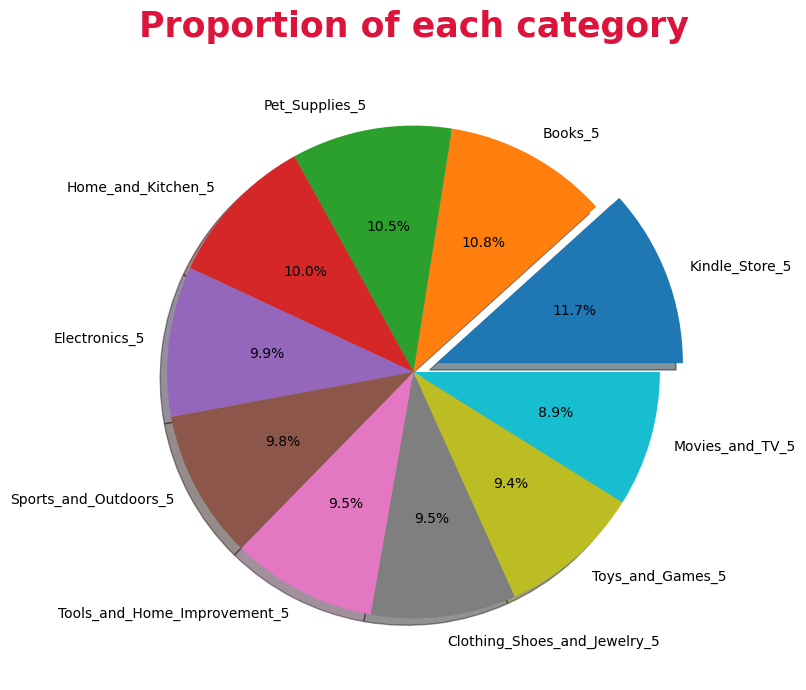

In [7]:
df['category'].value_counts()

plt.figure(figsize=(15,8))
labels = df['category'].value_counts().keys()
values = df['category'].value_counts().values
explode = [0.1] + [0] * (len(values) - 1)
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each category', fontweight='bold', fontsize=25, pad=20, color='crimson')
plt.show()

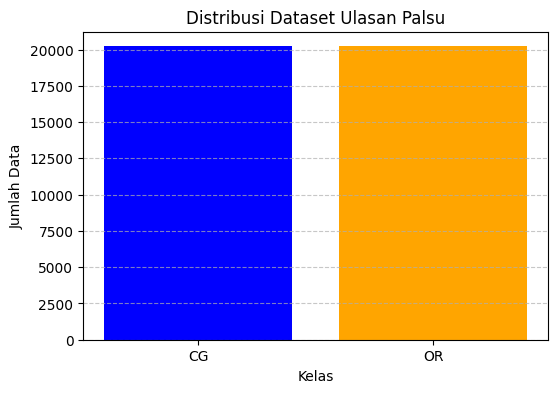

In [8]:
train_counts = Counter(df['label'].astype(str))

plt.figure(figsize=(6, 4))
bars = plt.bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])

plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Dataset Ulasan Palsu")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Clean Text

In [9]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = text.strip()
    return text
df['cleaned_text'] = df['text_'].apply(clean_text)
print(df[['text_', 'cleaned_text']].head(4).to_string())

                                                                               text_                                                                     cleaned_text
0        Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty           Love this  Well made sturdy and very comfortable  I love itVery pretty
1   love it, a great upgrade from the original.  I've had mine for a couple of years    love it a great upgrade from the original  Ive had mine for a couple of years
2                This pillow saved my back. I love the look and feel of this pillow.                This pillow saved my back I love the look and feel of this pillow
3  Missing information on how to use it, but it is a great product for the price!  I  Missing information on how to use it but it is a great product for the price  I


## Label Encoding

In [10]:
df['label'] = df['label'].map({'CG': 1, 'OR': 0}).astype(int)
print(df[['label']].head())

   label
0      1
1      1
2      1
3      1
4      1


## Save Preprocessed Dataset

In [11]:
df.to_csv('/kaggle/working/preprocessed-fake-reviews-dataset.csv', index=False)